In [20]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [21]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

In [22]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r"D:\Derin_Ogrenme\doma\Veri",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 4500 files belonging to 3 classes.


In [23]:
class_names= dataset.class_names
class_names


['Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_healthy']

In [24]:
trainsize= 0.8
len(dataset)* trainsize

112.80000000000001

In [25]:
train_ds= dataset.take(112)
len(train_ds)

112

In [26]:
testsize= 0.1
len(dataset)*testsize


14.100000000000001

In [27]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds


In [28]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [29]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [30]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1./255)
])


In [31]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [32]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [33]:
input_shape= (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE ,CHANNELS)
n_classes=3

model= models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size=(3,3), activation= "relu", input_shape= input_shape),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,kernel_size=(3,3), activation= "relu"),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(n_classes,activation="softmax"),
])
model.build(input_shape=input_shape)

In [34]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [37]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=2,
)

Epoch 1/2
112/112 ━━━━━━━━━━━━━━━━━━━━ 90s 800ms/step - accuracy: 0.4638 - loss: 1.0072 - val_accuracy: 0.7121 - val_loss: 0.6080
Epoch 2/2
112/112 ━━━━━━━━━━━━━━━━━━━━ 83s 741ms/step - accuracy: 0.7727 - loss: 0.5232 - val_accuracy: 0.8170 - val_loss: 0.4213


def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

NameError: name 'predict' is not defined

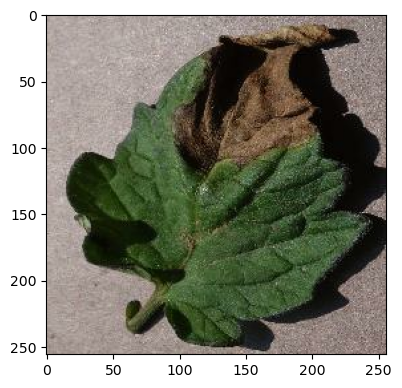

In [ ]:
import numpy as np 
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [ ]:
import os
model_version=max([int(i) for i in os.listdir("D://Derin_Ogrenme//doma//saved_models//models//") + [0]])+1
tf.saved_model.save(model,f"D://Derin_Ogrenme//doma//saved_models//models//"{model_version}")

In [44]:
import os
model_version=max([int(i) for i in os.listdir("D://Derin_Ogrenme//doma//saved_models//models") + [0]])+1
model.save(f"D://Derin_Ogrenme//doma//saved_models//models//{model_version}")

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=D://Derin_Ogrenme//doma//saved_models//models//3.

In [48]:
#yeni deneme
import os
model_version = max([int(i) for i in os.listdir("D://Derin_Ogrenme//doma//saved_models//models//") if i.isdigit()] + [0]) + 1

save_path = os.path.join(f"D://Derin_Ogrenme//doma//saved_models//models//", f"{model_version}.keras")



In [49]:
model.save("../domates.h5")

In [ ]:
import os
import tensorflow as tf

# Modellerin bulunduğu dizin
models_dir = r"D:\\Derin_Ogrenme\\doma\\saved_models\\models\\"

# En son model versiyonunu bulma
model_version = max([int(i) for i in os.listdir(models_dir) if i.isdigit()] + [0]) + 1

# Yeni modeli kaydetmek için yol oluşturma
save_path = f"D:\\Derin_Ogrenme\\doma\\saved_models\\models\\{model_version}"

# Modeli kaydetme
tf.saved_model.save(model, save_path)


INFO:tensorflow:Assets written to: D:\Derin_Ogrenme\doma\saved_models\models\1\assets


INFO:tensorflow:Assets written to: D:\Derin_Ogrenme\doma\saved_models\models\1\assets


In [ ]:
model.save('my_model.keras')


In [ ]:
import os
model_version=max([int(i) for i in os.listdir("D://Derin_Ogrenme//doma//saved_models//models//") + [0]])+1


import os
import tensorflow as tf

model_directory = "D://Derin_Ogrenme//doma//saved_models//models//"
model_path = os.path.join(model_directory, str(model_version))

tf.saved_model.save(model, model_path)


ValueError: invalid literal for int() with base 10: 'model2'

In [ ]:
import tensorflow as tf

model.save('path_to_my_model.h5')  # Modeli .h5 formatında kaydet

# Modeli .h5 formatında yükle
model = tf.keras.models.load_model('path_to_my_model.h5')


In [45]:
import os

def get_model_versions(directory):
    versions = []
    for name in os.listdir(directory):
        try:
            versions.append(int(name))
        except ValueError:
            # is not an int, skip it
            pass
    return versions

# Dizin yolu
directory = "D://Derin_Ogrenme//doma//saved_models//models"

# Mevcut sürümleri al
model_versions = get_model_versions(directory)

# Eğer dizin boşsa 0'dan başla, değilse en yüksek sürüm numarasına 1 ekle
if model_versions:
    model_version = max(model_versions) + 1
else:
    model_version = 1

# Modeli kaydet
model.save(f"{directory}//{model_version}.h5")


In [50]:
import os

# Dizin yolu
directory = "D://Derin_Ogrenme//doma//saved_models//models"

# Mevcut sürümleri al
model_versions = [int(i) for i in os.listdir(directory) if i.isdigit()]

# Eğer dizin boşsa 0'dan başla, değilse en yüksek sürüm numarasına 1 ekle
model_version = max(model_versions + [0]) + 1

# Kaydetme yolu oluştur
save_path = os.path.join(directory, f"{model_version}.h5")

# Modeli kaydet
model.save(save_path)


In [53]:
# Kütüphaneleri import et
import os

# Klasör yolunu ve mevcut sürümleri belirle
directory = "D://Derin_Ogrenme//doma//saved_models//models"

# Mevcut sürümleri al
model_versions = [int(i) for i in os.listdir(directory) if i.isdigit()]

# Eğer dizin boşsa 0'dan başla, değilse en yüksek sürüm numarasına 1 ekle
model_version = max(model_versions + [0]) + 1

# Model kaydetme yolu oluştur
save_path = os.path.join(directory, f"{model_version}.keras")

# Modeli kaydet
model.save(save_path)

print(f"Model başarıyla {save_path} yoluna kaydedildi.")


Model başarıyla D://Derin_Ogrenme//doma//saved_models//models\3.keras yoluna kaydedildi.


In [1]:
import tensorflow as tf
print(tf.__version__)

2.16.1
